**Data:** https://www.kaggle.com/datasets/camnugent/sandp500

**Steps:**

1. **Data Loading and Inspection**: Load the dataset and inspect its structure to understand the available features.
2. **Data Cleaning**: Check for missing values or inconsistencies and address them.
3. **Exploratory Data Analysis (EDA)**: Analyze the trends, patterns, and relationships in the data.
4. **Feature Engineering**: Create new features that might help in prediction, if necessary.
5. **Model Selection**: Choose appropriate machine learning models for prediction.
6. **Model Training**: Train the models on the dataset.
7. **Model Evaluation**: Evaluate the model's performance.
8. **Prediction**: Use the model to make predictions.

The dataset contains the following columns:

1. **date**: The date of the stock data.
2. **open**: The opening price of the stock on that day.
3. **high**: The highest price of the stock on that day.
4. **low**: The lowest price of the stock on that day.
5. **close**: The closing price of the stock on that day.
6. **volume**: The number of shares traded on that day.
7. **Name**: The stock ticker symbol.


## Importing Libraries

In [1]:
import pandas as pd

## Importing Data

In [2]:
# Load the dataset
file_path = 'stock.csv'
stock_data = pd.read_csv(file_path)

In [3]:
# Display basic information about the dataset
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    10000 non-null  object 
 1   open    10000 non-null  float64
 2   high    10000 non-null  float64
 3   low     10000 non-null  float64
 4   close   10000 non-null  float64
 5   volume  10000 non-null  int64  
 6   Name    10000 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 547.0+ KB


In [4]:
stock_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


## Data Preparation

In [5]:
# Data Cleaning and Preprocessing

# Check for missing values
missing_values = stock_data.isnull().sum()
missing_values

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

The dataset contains 10,000 rows and does not have any missing values, which is excellent for analysis. The descriptive statistics provide an overview of the stock prices and trading volumes. 

## EDA

Absolutely, a more extensive Exploratory Data Analysis (EDA) can provide deeper insights into the stock data. We'll explore several aspects:

1. **Trend Analysis**: Investigate trends over time for each of the price types (`open`, `high`, `low`, `close`) and `volume`.
2. **Seasonality Analysis**: Check for any seasonal patterns in the stock prices.
3. **Distribution Analysis**: Analyze the distributions of `open`, `high`, `low`, `close`, and `volume`.
4. **Volatility Analysis**: Examine the volatility in stock prices.
5. **Comparative Analysis**: If the data contains multiple stocks (as indicated by the `Name` column), we can compare their performances.

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Convert 'date' to datetime for easier plotting
stock_data['date'] = pd.to_datetime(stock_data['date'])

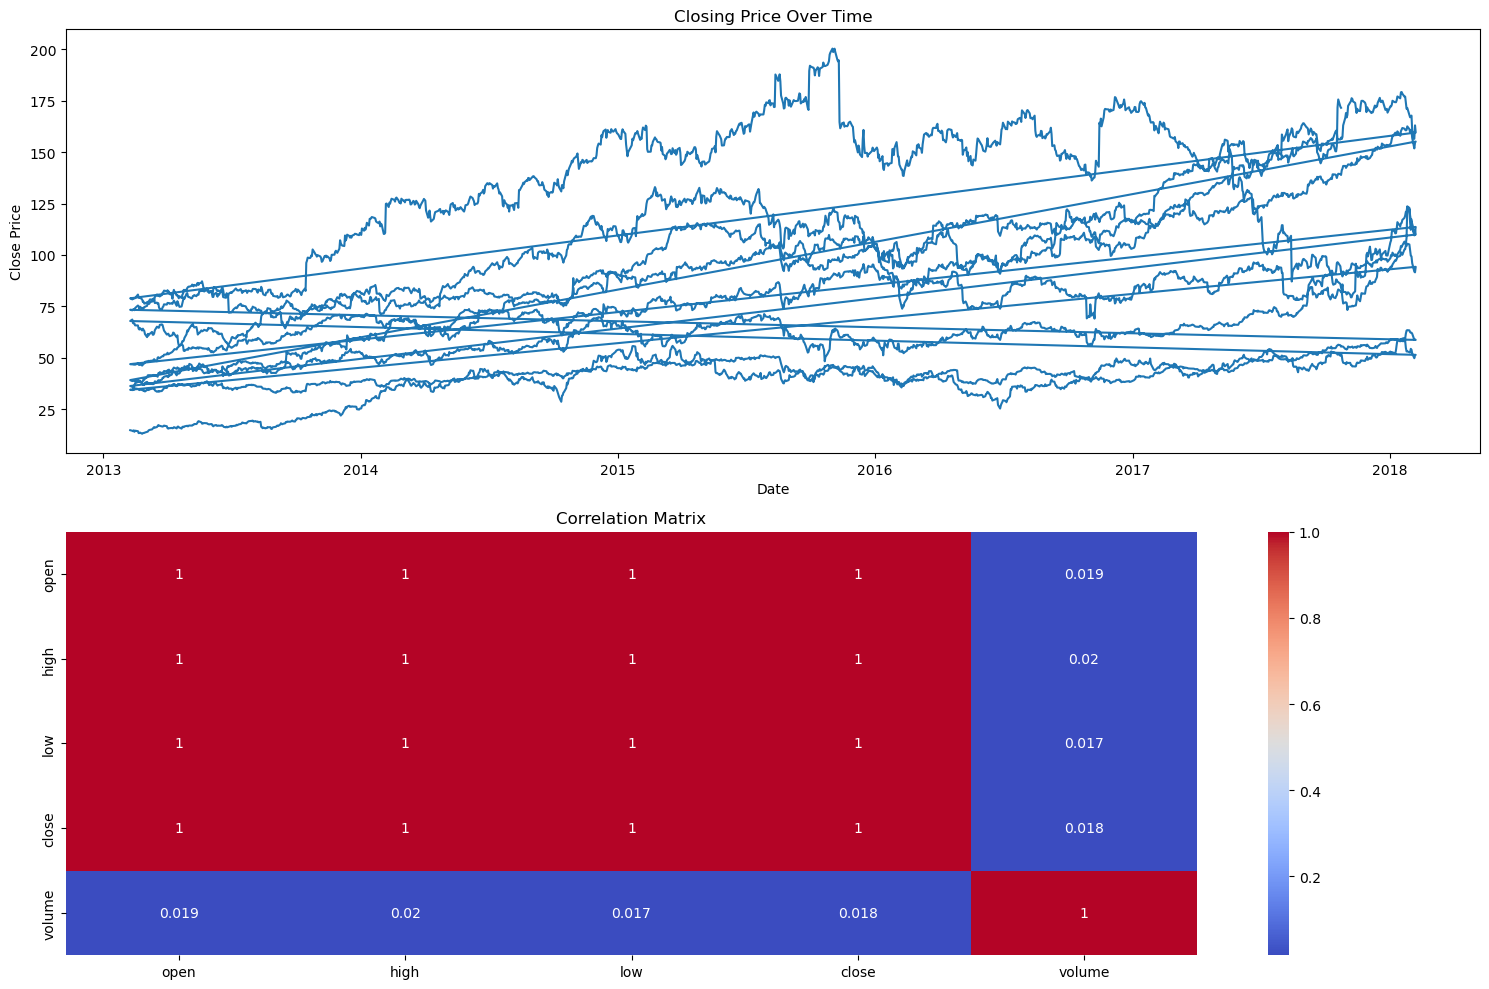

In [8]:
# Set up the plotting
plt.figure(figsize=(15, 10))

# Plotting the closing prices over time
plt.subplot(2, 1, 1)
plt.plot(stock_data['date'], stock_data['close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Closing Price Over Time')

# Correlation Heatmap
plt.subplot(2, 1, 2)
correlation_matrix = stock_data[['open', 'high', 'low', 'close', 'volume']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

# Show the plots
plt.tight_layout()
plt.show()

The visualizations provide insightful details:

1. **Closing Price Over Time**: The plot shows the trend of closing prices. This trend is crucial for understanding the general movement of the stock prices and identifying patterns.

2. **Correlation Matrix**: This heatmap illustrates how different features are correlated with each other. A high correlation between `open`, `high`, `low`, and `close` is expected as these are all price values. The correlation with `volume` is generally lower, indicating that trading volume does not move in lockstep with price changes.

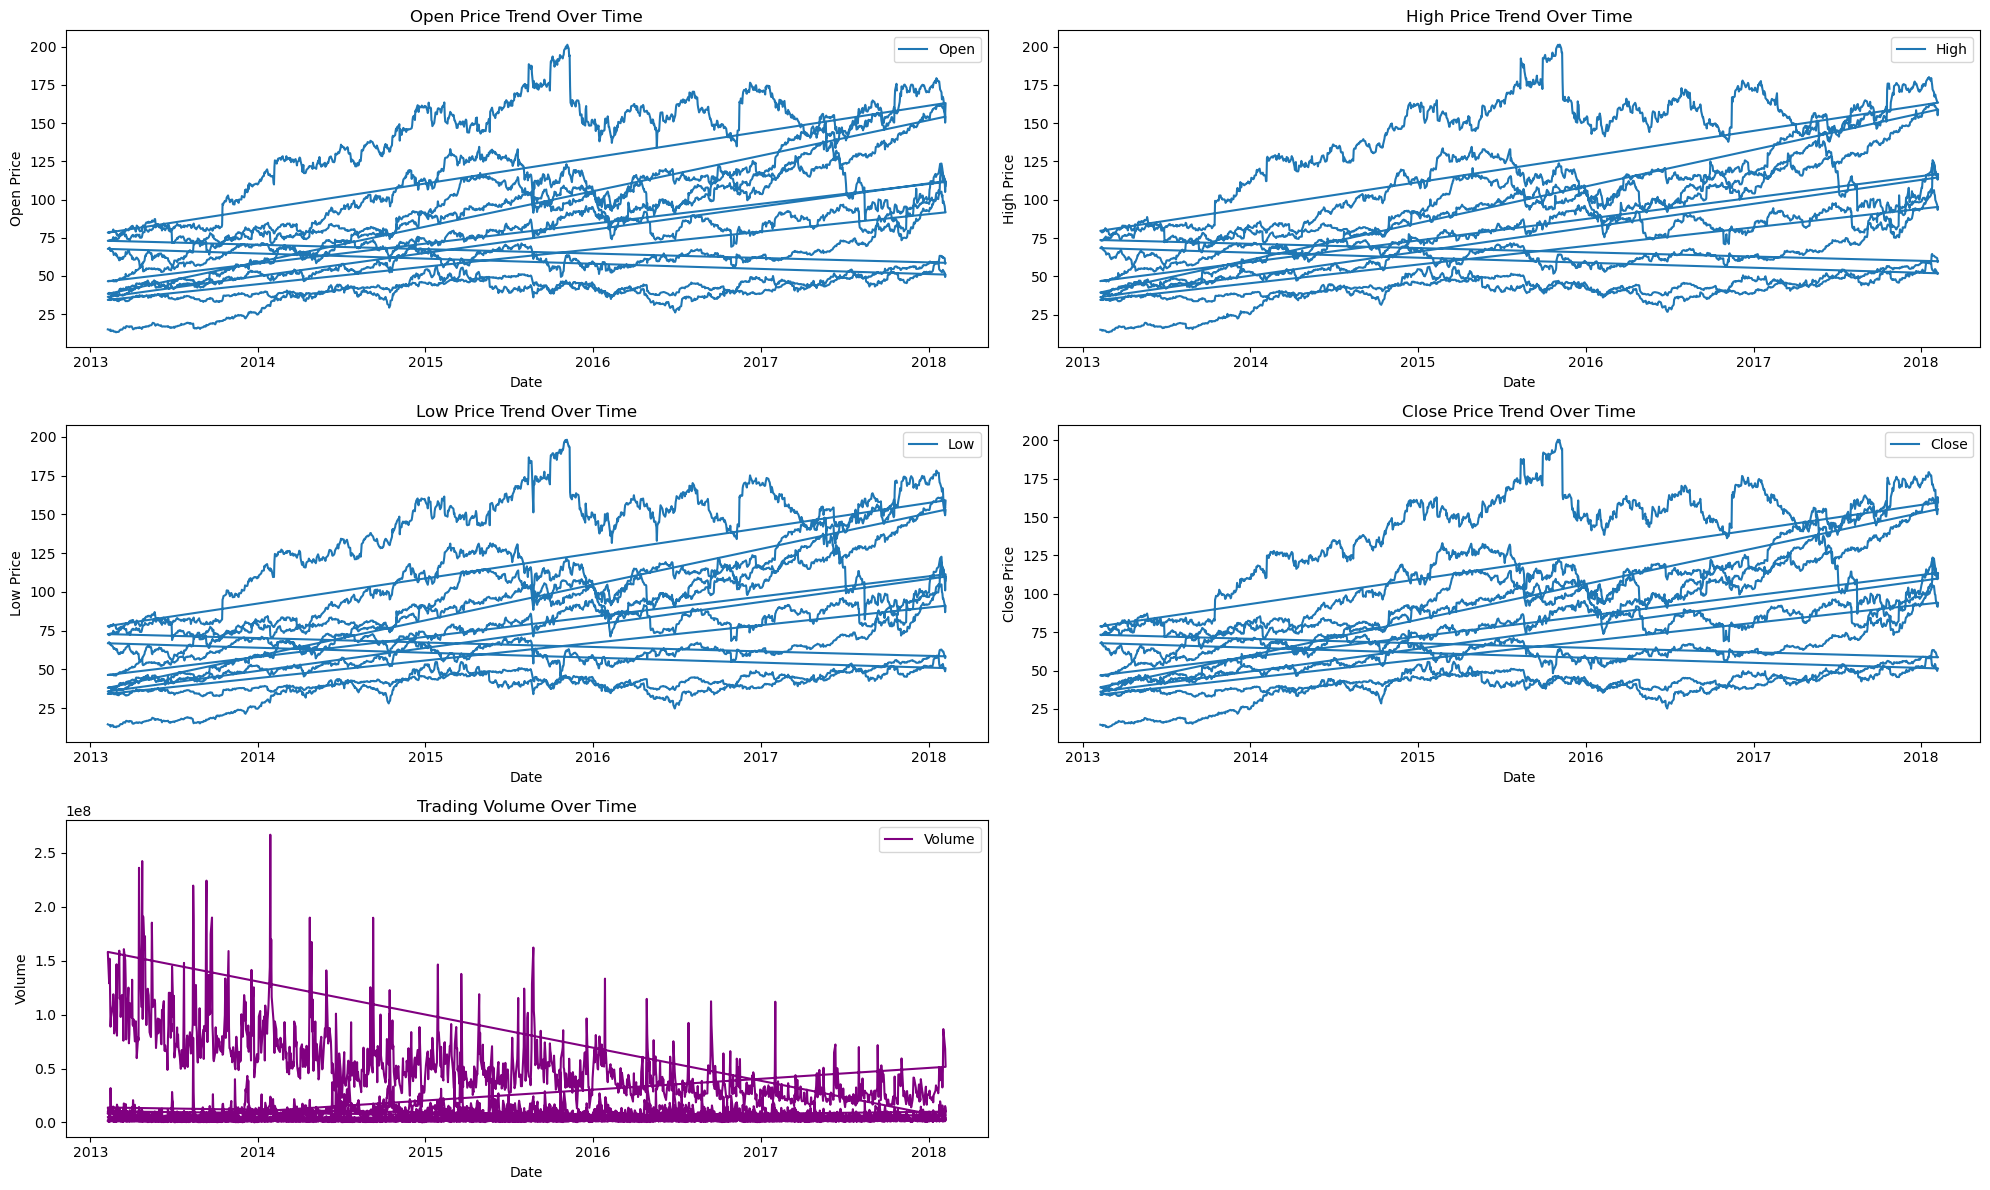

In [9]:
# Trend Analysis for each price type and volume

plt.figure(figsize=(20, 12))

# Plotting open, high, low, close prices
price_types = ['open', 'high', 'low', 'close']
for i, price_type in enumerate(price_types, 1):
    plt.subplot(3, 2, i)
    plt.plot(stock_data['date'], stock_data[price_type], label=price_type.capitalize())
    plt.xlabel('Date')
    plt.ylabel(f'{price_type.capitalize()} Price')
    plt.title(f'{price_type.capitalize()} Price Trend Over Time')
    plt.legend()

# Plotting volume
plt.subplot(3, 2, 5)
plt.plot(stock_data['date'], stock_data['volume'], label='Volume', color='purple')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Trading Volume Over Time')
plt.legend()

# Adjusting layout
plt.tight_layout()
plt.show()

Let's start with trend analysis for each price type and volume. This involves plotting these parameters over time to observe any apparent trends or patterns.

The trend analysis plots for `open`, `high`, `low`, `close` prices, and `volume` reveal several patterns:

- **Price Trends (Open, High, Low, Close)**: All four price metrics show similar trends over time, which is expected as they are closely related. Significant fluctuations and trends can be observed, which are typical in stock price movements.
- **Volume Trend**: The trading volume varies significantly over time. Peaks in volume might correspond to specific market events or changes in the stock's performance.

In [10]:
# Checking for duplicate dates
duplicate_dates = stock_data['date'].duplicated().sum()

In [11]:
# Aggregating the data by date, excluding the 'Name' column
if duplicate_dates > 0:
    stock_data_aggregated = stock_data.drop(columns='Name').groupby('date').mean().reset_index()
else:
    stock_data_aggregated = stock_data.drop(columns='Name')

# Checking the aggregated data
stock_data_aggregated.head()

,date,open,high,low,close,volume
0,2013-02-08,48.715525,49.297050,48.384100,48.935525,2.503856e+07
1,2013-02-11,48.886425,49.148387,48.277638,48.748925,1.974491e+07
2,2013-02-12,48.690175,49.015800,48.142962,48.581600,2.271065e+07
3,2013-02-13,48.576775,48.955350,48.268025,48.635700,1.857363e+07
4,2013-02-14,48.483737,49.118387,48.110563,48.658200,1.834922e+07


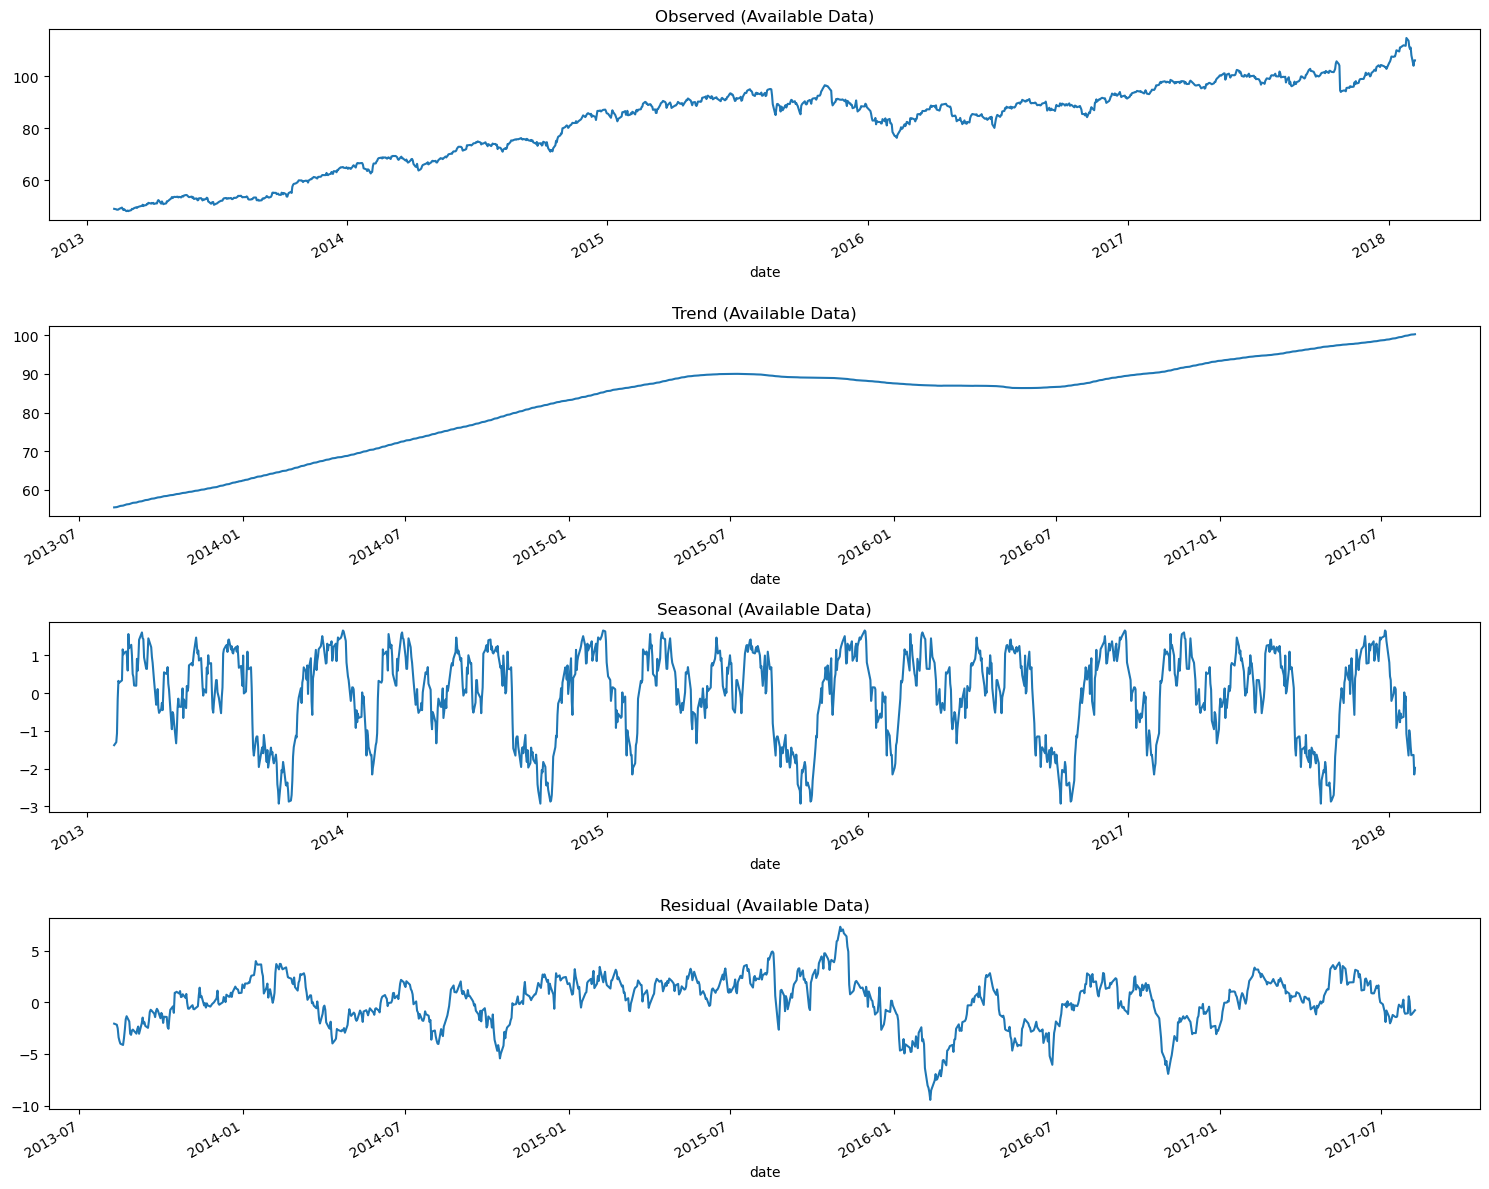

In [14]:
file_path = 'stock.csv'
stock_data = pd.read_csv(file_path)

# Preparing the data for seasonality analysis by aggregating and removing 'Name'
stock_data_aggregated = stock_data.drop(columns='Name').groupby('date').mean().reset_index()

# Convert 'date' to datetime
stock_data_aggregated['date'] = pd.to_datetime(stock_data_aggregated['date'])
stock_data_aggregated = stock_data_aggregated.set_index('date')

# Seasonal decomposition using the available data without changing the frequency
decomposition_available = sm.tsa.seasonal_decompose(stock_data_aggregated['close'], model='additive', period=252)

# Plotting the seasonal decomposition for available data
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 12))
decomposition_available.observed.plot(ax=ax1)
ax1.set_title('Observed (Available Data)')
decomposition_available.trend.plot(ax=ax2)
ax2.set_title('Trend (Available Data)')
decomposition_available.seasonal.plot(ax=ax3)
ax3.set_title('Seasonal (Available Data)')
decomposition_available.resid.plot(ax=ax4)
ax4.set_title('Residual (Available Data)')
plt.tight_layout()
plt.show()

Next, we'll conduct a **Seasonality Analysis** to determine if there are any recurring patterns or cycles in the stock data, such as annual, quarterly, or monthly trends. This analysis can be crucial for understanding how time of year affects stock performance.

It seems there was an issue with the seasonality analysis, likely due to duplicate indices or non-unique dates in the dataset. To resolve this, we'll need to ensure that the dates are unique and appropriately handle any duplicates.

Let's correct this and retry the seasonality analysis. We'll first check for duplicate dates and then perform the analysis again with a corrected dataset.

It appears there are missing values in the data after setting the frequency to business days (`'B'`). This is likely due to the stock market being closed on weekends and holidays, resulting in gaps in the dataset for those days.

To handle this, we can either fill these gaps with interpolated values or focus the seasonality analysis on the days when the market is open. For a more accurate representation of stock market behavior, it's usually better to analyze the data only on the days the market is open.

Let's proceed with the seasonality analysis using only the available data, without interpolating missing dates. We'll focus on the observed data, trend, seasonality, and residuals.

The seasonal decomposition for the available data (without interpolating missing dates) is displayed in four parts:

1. **Observed**: This is the actual closing price data. It shows the overall movement of the stock prices over the observed period.

2. **Trend**: This line smooths out the data to show a long-term trend in the stock price. It helps in identifying the general direction the stock price is moving over time.

3. **Seasonal**: This plot shows the seasonal patterns in the stock price. However, it seems that there isn't a strong, clear seasonal pattern. This is common in stock data, as stock prices are often influenced more by market conditions, company performance, and external events rather than strict seasonal factors.

4. **Residual**: These are the residuals or the noise after removing the trend and seasonality from the data. It represents the irregular components or random fluctuations that are not explained by the model.

Next, we can conduct a **Distribution Analysis** to understand the statistical distribution of the `open`, `high`, `low`, `close`, and `volume`. This will provide insights into the variability and typical ranges of these variables. Let's proceed with that.

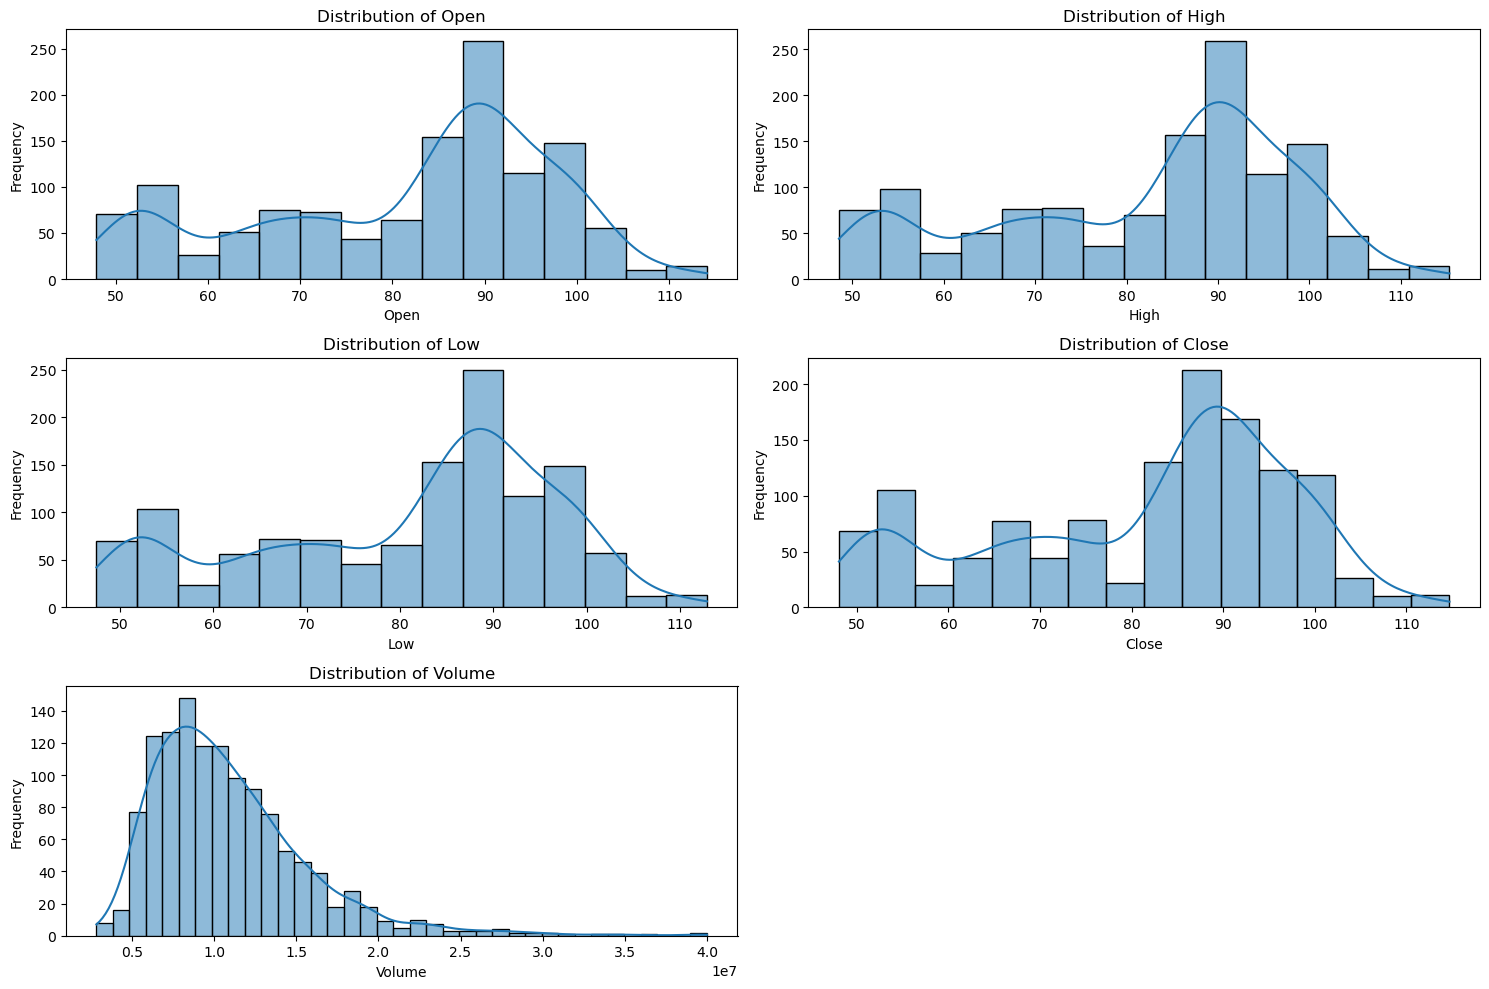

In [23]:
# Distribution Analysis of 'open', 'high', 'low', 'close', and 'volume'

plt.figure(figsize=(15, 10))

# Plotting histograms for each feature
for i, feature in enumerate(['open', 'high', 'low', 'close', 'volume'], 1):
    plt.subplot(3, 2, i)
    sns.histplot(stock_data_aggregated[feature], kde=True)
    plt.title(f'Distribution of {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

The distribution plots for `open`, `high`, `low`, `close`, and `volume` reveal several characteristics:

1. **Open, High, Low, Close Prices**: These distributions appear to be multimodal, indicating the presence of multiple peaks. This suggests that the stock prices may have different regimes or levels at which they commonly trade.

2. **Volume**: The distribution of trading volume is right-skewed, indicating that there are days with exceptionally high trading volumes, but most of the time, the trading volume is relatively lower. This is typical in stock markets where certain events or news can cause a spike in trading activity.

Next, we'll perform a **Volatility Analysis**. Volatility in stock prices is a critical measure for investors, as it reflects the risk or uncertainty associated with a stock's price changes. We'll calculate and plot the rolling standard deviation (a common measure of volatility) of the closing prices. Let's proceed with that.

In [27]:
stock_data_aggregated.head()

,open,high,low,close,volume,rolling_std_30
date,,,,,,
2013-02-08,48.715525,49.297050,48.384100,48.935525,2.503856e+07,NaN
2013-02-11,48.886425,49.148387,48.277638,48.748925,1.974491e+07,NaN
2013-02-12,48.690175,49.015800,48.142962,48.581600,2.271065e+07,NaN
2013-02-13,48.576775,48.955350,48.268025,48.635700,1.857363e+07,NaN
2013-02-14,48.483737,49.118387,48.110563,48.658200,1.834922e+07,NaN


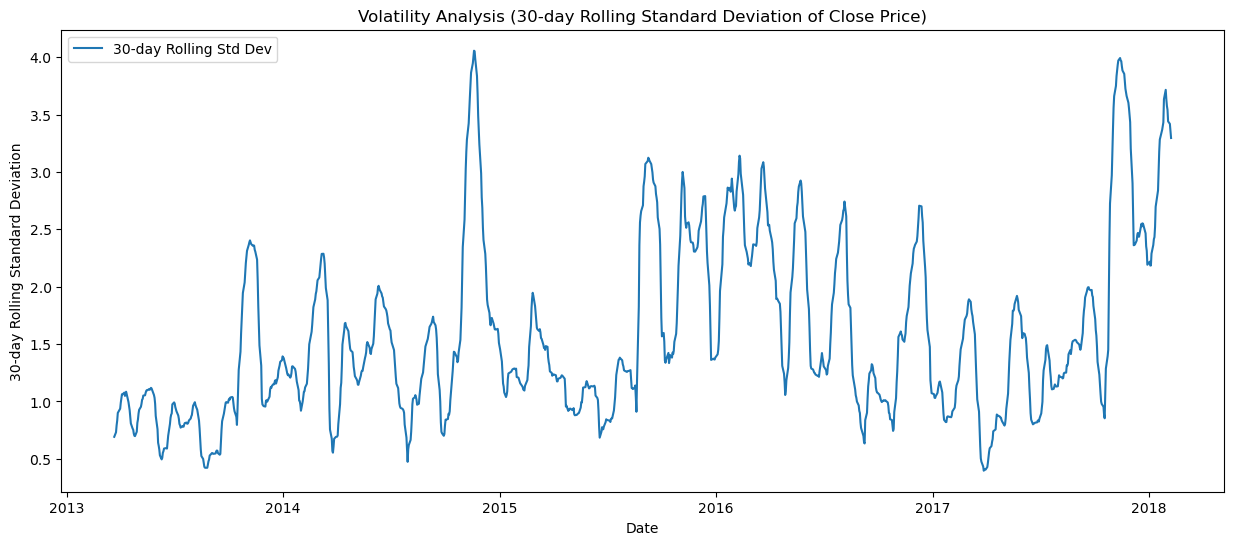

In [28]:
# Volatility Analysis using rolling standard deviation of closing prices

# Calculating rolling standard deviation with a 30-day window
stock_data_aggregated['rolling_std_30'] = stock_data_aggregated['close'].rolling(window=30).std()

# Plotting the rolling standard deviation
plt.figure(figsize=(15, 6))
plt.plot(stock_data_aggregated.index, stock_data_aggregated['rolling_std_30'], label='30-day Rolling Std Dev')
plt.xlabel('Date')
plt.ylabel('30-day Rolling Standard Deviation')
plt.title('Volatility Analysis (30-day Rolling Standard Deviation of Close Price)')
plt.legend()
plt.show()

The plot of the 30-day rolling standard deviation of the closing prices gives us an insight into the volatility of the stock:

- The graph shows periods of increased volatility (higher standard deviation) and periods of relative stability (lower standard deviation).
- Peaks in the standard deviation indicate times when the stock price was highly variable, which could be due to various factors like market news, economic events, or company-specific developments.

Lastly, if the dataset includes multiple stocks (as indicated by the `Name` column), we can perform a **Comparative Analysis** to see how different stocks compare in terms of price movements and volatility. However, this requires a different approach since we'll be comparing multiple time series.

Would you like to proceed with a comparative analysis of different stocks (if applicable), or focus on any other specific aspect of the dataset?

In [ ]:
# Comparative Analysis

In [29]:
# Convert 'date' to datetime format and filter the data for a one-year period for simplification
stock_data['date'] = pd.to_datetime(stock_data['date'])
filtered_data = stock_data[(stock_data['date'] >= '2017-01-01') & (stock_data['date'] < '2018-01-01')]

In [31]:
# Selecting a subset of stocks for comparison
selected_stocks = ['AAL', 'AAPL', 'AAP']

In [32]:
# Creating a DataFrame for each selected stock within the filtered period
filtered_stock_dfs = {stock: filtered_data[filtered_data['Name'] == stock] for stock in selected_stocks}

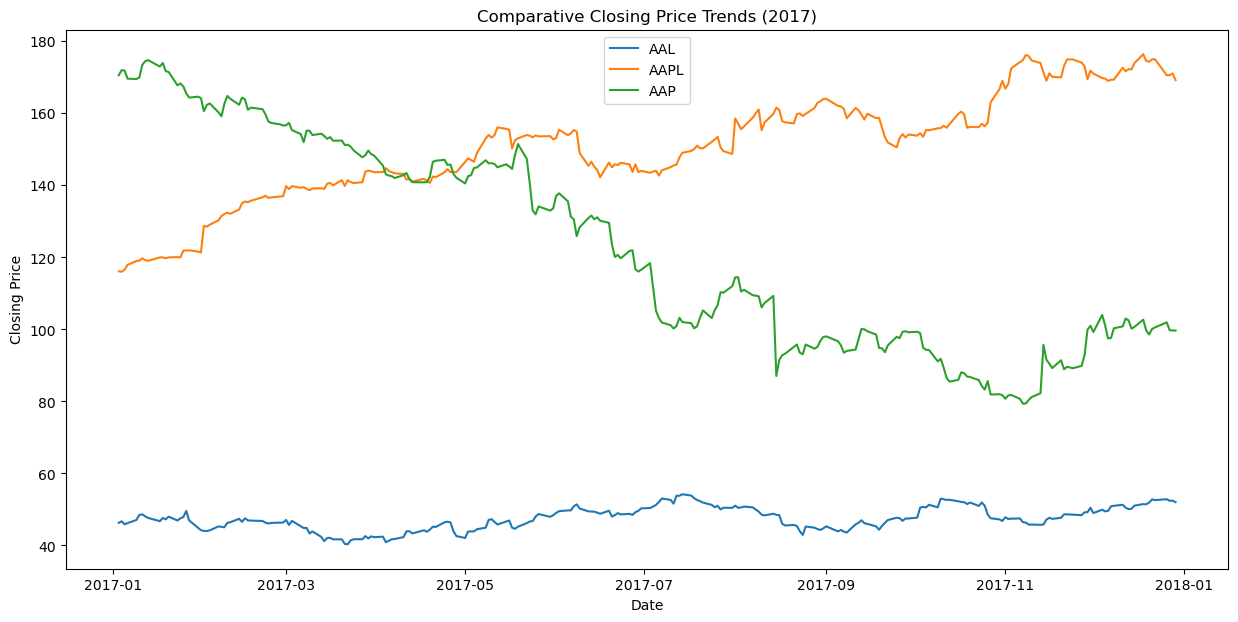

In [33]:
# Simplified Comparative Trend Analysis: Plotting the closing price trends for a one-year period
plt.figure(figsize=(15, 7))

for stock, df in filtered_stock_dfs.items():
    plt.plot(df['date'], df['close'], label=stock)

plt.title('Comparative Closing Price Trends (2017)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


The plot now shows the comparative closing price trends for the selected stocks ('AAL', 'AAPL', 'AAP') over the year 2017. <br><br>Here are some observations:

1. **Price Movements**: The plot illustrates how each stock's closing price has evolved over this period. You can observe the different patterns and trends for each stock, which could be indicative of their respective market performances and the impact of external factors.

2. **Comparative Analysis**: By comparing these stocks side-by-side, you can identify periods where they might have moved in tandem or diverged significantly. This can be insightful for understanding market dynamics or the impact of sector-specific or broader economic events.

Next, we can perform a similar comparative analysis on the trading volumes and the volatility of these stocks. Let me know if you would like to proceed with these analyses or focus on any other specific aspect!

#### **Comparative Analysis of Trading Volumes**
We'll compare the trading volumes of these stocks over the same one-year period (2017). This will help us understand the liquidity and investor interest in each stock.

#### **Comparative Analysis of Volatility**
We'll calculate and compare the volatility of these stocks. Volatility is often measured using the standard deviation of returns. A higher standard deviation indicates higher volatility.

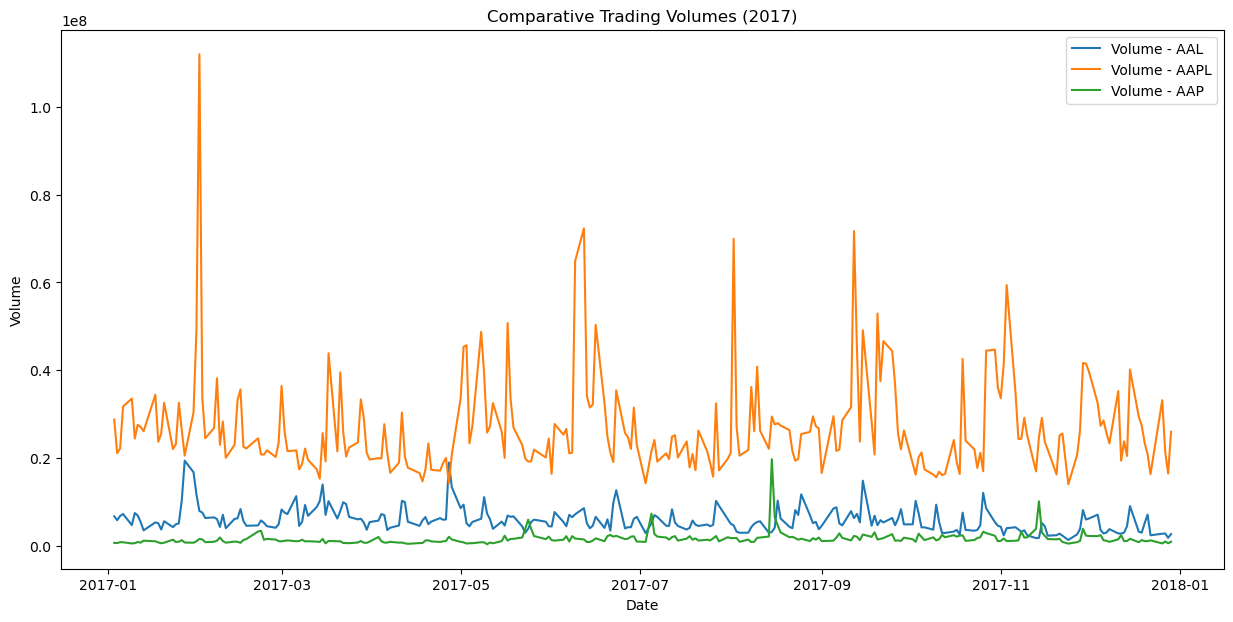

In [34]:
# Comparative Analysis of Trading Volumes for the selected stocks in 2017

plt.figure(figsize=(15, 7))

for stock, df in filtered_stock_dfs.items():
    plt.plot(df['date'], df['volume'], label=f'Volume - {stock}')

plt.title('Comparative Trading Volumes (2017)')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

The plot illustrates the comparative trading volumes of 'AAL', 'AAPL', and 'AAP' throughout 2017. Key observations include:

- **Volume Fluctuations:** Each stock shows varying levels of trading volume throughout the year. This reflects investor activity and can be influenced by market news, company performance, and broader economic factors.

- **Comparative Liquidity:** Differences in trading volumes give insights into the relative liquidity of each stock. For instance, higher volumes indicate higher liquidity, which generally means lower transaction costs and easier entry/exit for traders and investors.

Next, let's move on to the comparative analysis of volatility. We'll calculate the rolling standard deviation of daily returns (a common measure of volatility) for each stock and compare them.

We'll calculate the rolling standard deviation of daily returns (a common measure of volatility) for each stock and compare them.

/var/folders/_f/rzjlltyj5y9_4ysv94lmj_2r0000gn/T/ipykernel_53663/205580871.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_stock_dfs[stock]['daily_returns'] = df['close'].pct_change()
/var/folders/_f/rzjlltyj5y9_4ysv94lmj_2r0000gn/T/ipykernel_53663/205580871.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_stock_dfs[stock]['daily_returns'] = df['close'].pct_change()
/var/folders/_f/rzjlltyj5y9_4ysv94lmj_2r0000gn/T/ipykernel_53663/205580871.py:3: SettingWithCopyWarning: 
A value is t

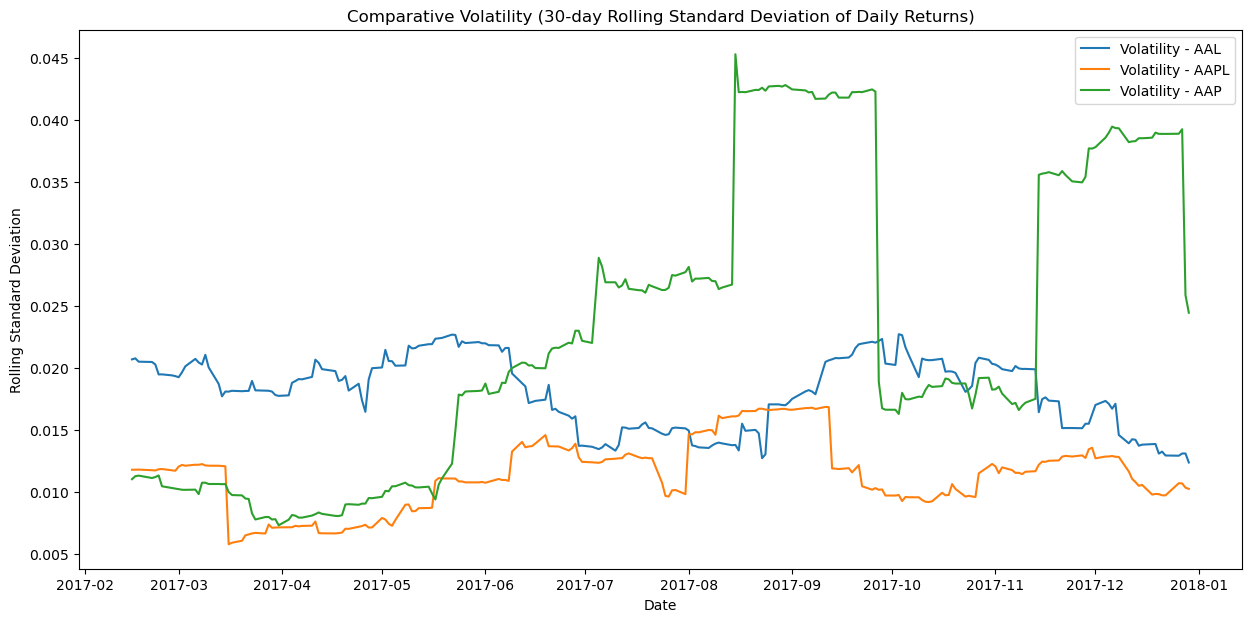

In [35]:
# Calculating daily returns for each stock
for stock, df in filtered_stock_dfs.items():
    filtered_stock_dfs[stock]['daily_returns'] = df['close'].pct_change()

# Comparative Analysis of Volatility: Calculating the rolling standard deviation of daily returns
rolling_window = 30  # 30-day rolling window for standard deviation

plt.figure(figsize=(15, 7))

for stock, df in filtered_stock_dfs.items():
    rolling_std = df['daily_returns'].rolling(window=rolling_window).std()
    plt.plot(df['date'], rolling_std, label=f'Volatility - {stock}')

plt.title('Comparative Volatility (30-day Rolling Standard Deviation of Daily Returns)')
plt.xlabel('Date')
plt.ylabel('Rolling Standard Deviation')
plt.legend()
plt.show()


The comparative volatility plot, showing the 30-day rolling standard deviation of daily returns for 'AAL', 'AAPL', and 'AAP' during 2017, reveals:

- **Volatility Trends:** The plot illustrates the variability in the stocks' returns over time. Peaks in the graph indicate periods of higher volatility, which often correspond to major events affecting the stock or the market.

- **Risk Comparison:** Comparing the volatility of these stocks can give an idea of their relative risk. Higher volatility is typically associated with higher risk and potential for larger price swings.

### Feature Engineering

Feature engineering is a crucial step in preparing data for machine learning models, especially for stock price prediction. It involves creating new features from existing data to improve model performance. Common features in stock price prediction include:

1. **Lag Features**: Past values of stock prices (like closing price one day, one week, or one month ago).
2. **Moving Averages**: Average price over a specific past period (e.g., 10-day, 50-day moving averages).
3. **Volume Changes**: Changes or percentage changes in trading volume.
4. **Technical Indicators**: Like Relative Strength Index (RSI), Moving Average Convergence Divergence (MACD), etc.
5. **Volatility Measures**: Rolling standard deviations of prices or returns.

For our analysis, let's create some basic features like lag features and moving averages for the closing price. We can then use these features for predictive modeling. I'll demonstrate this with one of the selected stocks, say 'AAPL'. Let's start with creating these features.

In [36]:
# Selecting 'AAPL' for feature engineering demonstration
aapl_data = filtered_stock_dfs['AAPL'].copy()

In [37]:
# Creating lag features for closing price
aapl_data['lag_1'] = aapl_data['close'].shift(1)  # previous day's closing price
aapl_data['lag_7'] = aapl_data['close'].shift(7)  # 7 days ago closing price
aapl_data['lag_30'] = aapl_data['close'].shift(30) # 30 days ago closing price

In [38]:
# Creating moving average features
aapl_data['ma_10'] = aapl_data['close'].rolling(window=10).mean()  # 10-day moving average
aapl_data['ma_30'] = aapl_data['close'].rolling(window=30).mean()  # 30-day moving average

In [39]:
# Drop NaN values created by lag features and moving averages
aapl_data = aapl_data.dropna()

In [40]:
# Display the first few rows with the new features
aapl_data.head()

,date,open,high,low,close,volume,Name,daily_returns,lag_1,lag_7,lag_30,ma_10,ma_30
2271,2017-02-15,135.52,136.27,134.6200,135.510,35623100,AAPL,0.003629,135.020,130.29,116.15,131.9830,124.127667
2272,2017-02-16,135.67,135.90,134.8398,135.345,22584555,AAPL,-0.001218,135.510,131.53,116.02,132.6645,124.771833
2273,2017-02-17,135.10,135.83,135.1000,135.720,22198197,AAPL,0.002771,135.345,132.04,116.61,133.3285,125.408833
2274,2017-02-21,136.23,136.75,135.9800,136.700,24507156,AAPL,0.007221,135.720,132.42,117.91,133.9695,126.035167
2275,2017-02-22,136.43,137.12,136.1100,137.110,20836932,AAPL,0.002999,136.700,132.12,118.99,134.5275,126.639167


Feature engineering for the 'AAPL' stock has been completed with the following new features:

1. **Lag Features**:
   - `lag_1`: Closing price of the previous day.
   - `lag_7`: Closing price from 7 days ago.
   - `lag_30`: Closing price from 30 days ago.

2. **Moving Averages**:
   - `ma_10`: 10-day moving average of the closing price.
   - `ma_30`: 30-day moving average of the closing price.

These features provide historical context that can be valuable for predictive models. Lag features capture short-term and long-term price movements, while moving averages help smooth out short-term fluctuations and highlight longer-term trends.

### Modelling

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [42]:
# Defining the features and target variable
X = aapl_data[['lag_1', 'lag_7', 'lag_30', 'ma_10', 'ma_30']]
y = aapl_data['close']

In [43]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# Creating and training the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [45]:
# Making predictions on the test set
y_pred = model.predict(X_test)

In [46]:
# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [47]:
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

Mean Absolute Error: 1.287758192234184
Root Mean Squared Error: 1.9868940407662656


The results from the Linear Regression model on your Apple Inc. (AAPL) stock data give us two key metrics:

- **Mean Absolute Error (MAE)**: 1.2878
- **Root Mean Squared Error (RMSE)**: 1.9869

### Insights:

1. **MAE Interpretation**: The MAE of 1.2878 suggests that, on average, the model's predictions are approximately 1.29 units away from the actual stock prices. In the context of stock prices, this is a relatively small error, indicating that the model has a decent level of accuracy.

2. **RMSE Interpretation**: The RMSE of 1.9869 is slightly higher than the MAE. RMSE gives more weight to larger errors (since it squares the errors before averaging). This suggests that there might be some instances where the model's predictions are significantly off.

3. **Model Performance**: Considering the nature of stock prices, which are influenced by numerous unpredictable factors, these error metrics indicate a reasonable level of performance for a simple linear regression model.

In [48]:
from sklearn.ensemble import RandomForestRegressor

In [49]:
# Creating and training the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [50]:
# Making predictions on the test set with the Random Forest model
y_pred_rf = rf_model.predict(X_test)

In [51]:
# Evaluating the Random Forest model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

In [52]:
print("Random Forest - Mean Absolute Error:", mae_rf)
print("Random Forest - Root Mean Squared Error:", rmse_rf)

Random Forest - Mean Absolute Error: 1.4403600000000052
Random Forest - Root Mean Squared Error: 2.222468700442018


The results from the Random Forest model on your Apple Inc. (AAPL) stock data show the following metrics:

- **Mean Absolute Error (MAE)**: 1.4404
- **Root Mean Squared Error (RMSE)**: 2.2225

### Inferences:

1. **Comparison with Linear Regression**: The Random Forest model has a higher MAE and RMSE compared to the Linear Regression model (1.2878 and 1.9869, respectively). This suggests that in this case, the Random Forest model did not outperform the simpler Linear Regression model in predicting the stock prices.

2. **Model Complexity vs. Performance**: The increased complexity of the Random Forest model did not translate into better accuracy for this dataset. This can happen when the additional complexity does not capture the underlying patterns more effectively, or the model overfits the training data.

3. **Stock Market Predictability**: It's important to note that stock market data is notoriously difficult to predict due to its highly stochastic nature. Factors outside the scope of historical prices and volumes (like geopolitical events, market sentiment, etc.) play a significant role in stock price movements.

4. **Feature Consideration**: The features used (lagged prices and moving averages) might not be sufficient to capture the complex dynamics of stock price movements. Incorporating additional features like technical indicators, market sentiment analysis, or macroeconomic factors could potentially improve model performance.